In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [3]:
# Load dataset
df = pd.read_csv('emails.csv')
print(df.head())

   WordCount  NumLinks  Spam
0         50         0     0
1         60         1     0
2        100         0     0
3        150         2     0
4        200         1     0


In [5]:
# Features and target
X = df[['WordCount', 'NumLinks']]
y = df['Spam']

In [7]:
# Scale features (important for SVM)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

In [11]:
#  Create & train SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [21]:
#  Predict & evaluate
y_pred = svm_model.predict(X_test)

In [15]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.5
Confusion Matrix:
 [[2 0]
 [2 0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       0.00      0.00      0.00         2

    accuracy                           0.50         4
   macro avg       0.25      0.50      0.33         4
weighted avg       0.25      0.50      0.33         4



C:\Users\sonap\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sonap\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sonap\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [23]:
# Predict new email
new_email = scaler.transform([[250, 3]])
prediction = svm_model.predict(new_email)
print(f"\nIs an email with 250 words & 3 links spam? {'Yes' if prediction[0]==1 else 'No'}")


Is an email with 250 words & 3 links spam? Yes


C:\Users\sonap\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


C:\Users\sonap\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


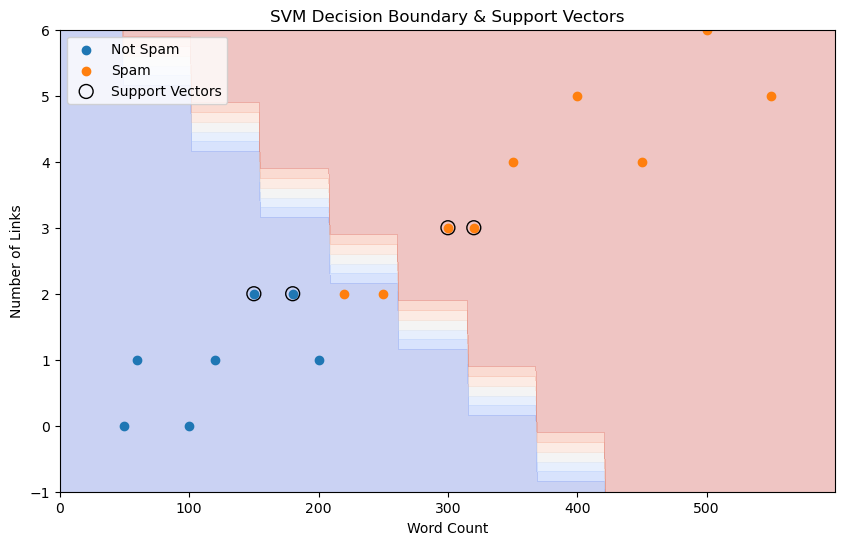

In [25]:
# Visualize decision boundary, points & support vectors

# Unscale for plotting axes in original units
X_unscaled = scaler.inverse_transform(X_scaled)

# Create meshgrid
h = 1.0  # step size for mesh
x_min, x_max = X_unscaled[:, 0].min() - 50, X_unscaled[:, 0].max() + 50
y_min, y_max = X_unscaled[:, 1].min() - 1, X_unscaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict for grid
Z = svm_model.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)

# Plot contour
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)

# Plot points
for label in [0, 1]:
    plt.scatter(X_unscaled[y == label][:, 0],
                X_unscaled[y == label][:, 1],
                label=f"{'Not Spam' if label == 0 else 'Spam'}")

# Plot support vectors
support_vectors = scaler.inverse_transform(svm_model.support_vectors_)
plt.scatter(support_vectors[:, 0],
            support_vectors[:, 1],
            s=100, facecolors='none', edgecolors='k', label='Support Vectors')

plt.xlabel('Word Count')
plt.ylabel('Number of Links')
plt.title('SVM Decision Boundary & Support Vectors')
plt.legend()
plt.show()